In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualización de los datos importantes para la predicción

## Goles a favor contra número de victorias cada año

### Cargar los datos de una temporada

In [2]:
import os

dataframes = []
carpeta = "Datos_Formateados/"  # Reemplaza "ruta/de/la/carpeta" con la ruta de la carpeta que deseas explorar

archivos = os.listdir(carpeta)
for archivo in archivos:
    df = pd.read_csv("Datos_Formateados/"+archivo)
    dataframes.append(df)
datos_partidos = pd.concat(dataframes, ignore_index=True)

temporadas = datos_partidos.groupby('season')
dataframes = []
for nombre_grupo, temporada_df in temporadas:
    dataframes.append(temporada_df)
    
dataframe_liga = pd.concat([dataframes[0],dataframes[1],dataframes[2]])
dataframe_liga.shape

(3690, 12)

### Conseguir los equipos de esa temporada

In [3]:
def get_equipos(dataframe: pd.DataFrame) -> list:
    list = []
    for idx in dataframe.index:
        if dataframe['home_team_id'][idx] not in list:
            list.append(dataframe['home_team_id'][idx])
        if dataframe['away_team_id'][idx] not in list:
            list.append(dataframe['away_team_id'][idx])
    return list

equipos = get_equipos(dataframe=dataframe_liga)
len(equipos)

30

### Conseguir el número de goles a favor de la temporada de cada equipo

In [4]:
def get_goles_a_favor(dataframe: pd.DataFrame, equipo: str) -> int:
    goles_local = dataframe.loc[dataframe['home_team_id'] == equipo, 'home_goals'].sum()
    goles_visitante = dataframe.loc[dataframe['away_team_id'] == equipo, 'away_goals'].sum()
    return goles_local + goles_visitante

for equipo in equipos:
    goles = get_goles_a_favor(dataframe=dataframe_liga, equipo=equipo)
    print("El "+str(equipo)+" ha marcado: "+str(int(goles))+" goles")

El 25 ha marcado: 701 goles
El 21 ha marcado: 733 goles
El 20 ha marcado: 584 goles
El 17 ha marcado: 773 goles
El 7 ha marcado: 621 goles
El 16 ha marcado: 633 goles
El 4 ha marcado: 685 goles
El 23 ha marcado: 757 goles
El 6 ha marcado: 708 goles
El 9 ha marcado: 780 goles
El 27 ha marcado: 646 goles
El 19 ha marcado: 729 goles
El 5 ha marcado: 668 goles
El 18 ha marcado: 565 goles
El 15 ha marcado: 685 goles
El 26 ha marcado: 669 goles
El 1 ha marcado: 716 goles
El 8 ha marcado: 619 goles
El 22 ha marcado: 679 goles
El 13 ha marcado: 556 goles
El 14 ha marcado: 598 goles
El 2 ha marcado: 648 goles
El 28 ha marcado: 679 goles
El 24 ha marcado: 566 goles
El 30 ha marcado: 561 goles
El 11 ha marcado: 624 goles
El 3 ha marcado: 687 goles
El 10 ha marcado: 717 goles
El 12 ha marcado: 600 goles
El 29 ha marcado: 567 goles


### Conseguir el número de victorias de cada equipo

In [5]:
def get_victorias(dataframe: pd.DataFrame, equipo: str) -> int:
    victorias_local = len(dataframe[(dataframe['home_team_id'] == equipo) & (dataframe['home_wins'] == 1)])
    victorias_visitante = len(dataframe[(dataframe['away_team_id'] == equipo) & (dataframe['home_wins'] == 0)])
    return victorias_local + victorias_visitante

for equipo in equipos:
    victorias = get_victorias(dataframe=dataframe_liga, equipo=equipo)
    #print("El "+equipo+" ha ganado: "+str(victorias)+" partidos")

### Graficar los datos

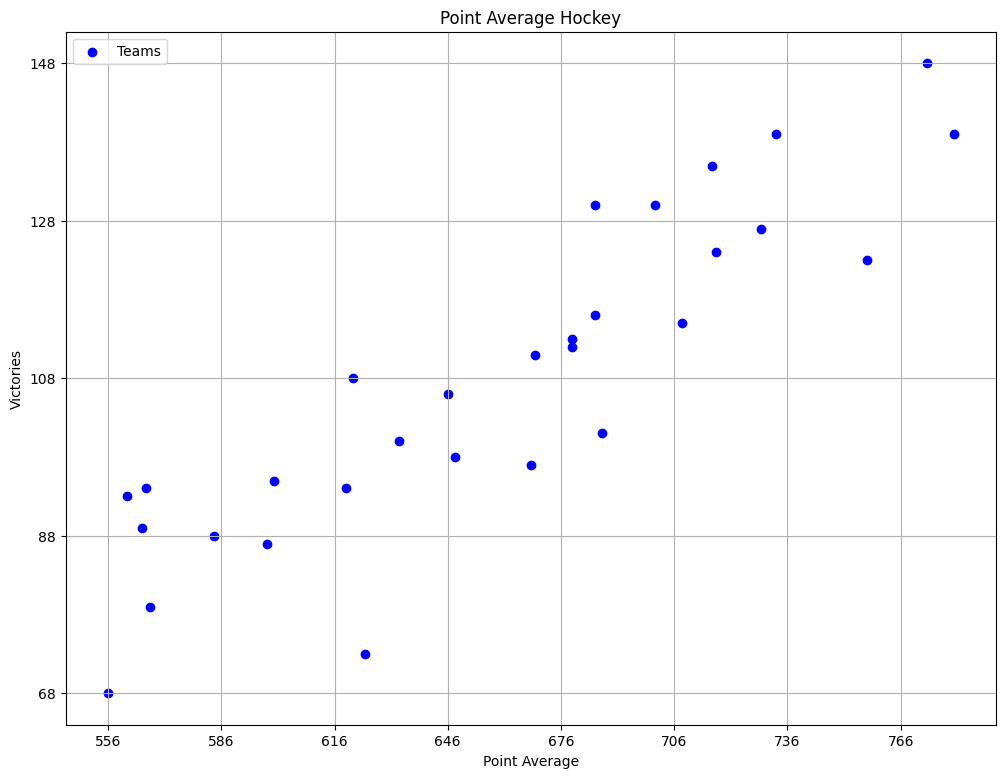

In [6]:
equipos = get_equipos(dataframe=dataframe_liga)
goles_marcados_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    goles_marcados_todos_equipos.append(get_goles_a_favor(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_goles = max(goles_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)
minimo_goles = min(goles_marcados_todos_equipos)
minimo_victorias = min(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(goles_marcados_todos_equipos, victorias_todos_equipos, color='blue', label='Teams')  # Puntos en la gráfica para cada equipo
#for i, equipo in enumerate(equipos):
#    plt.text(goles_marcados_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Point Average')
plt.ylabel('Victories')
plt.title('Point Average Hockey')
plt.xticks(range(minimo_goles, int(maximos_goles)+1, 30))  # Definir los límites y el paso del eje x
plt.yticks(range(minimo_victorias, maximas_victorias+1, 20))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

## Goles en contra vs victorias cada año

### Conseguir goles en contra de cada equipo cada año

In [7]:
def get_goles_en_contra(dataframe: pd.DataFrame, equipo: str) -> int:
    goles_encajados_local = dataframe.loc[dataframe['home_team_id'] == equipo, 'away_goals'].sum()
    goles_encajados_visitante = dataframe.loc[dataframe['away_team_id'] == equipo, 'home_goals'].sum()
    return goles_encajados_local + goles_encajados_visitante

for equipo in equipos:
    goles = get_goles_en_contra(dataframe=dataframe_liga, equipo=equipo)
    #print("El "+equipo+" ha encajado: "+str(goles)+" goles")

### Graficar los datos

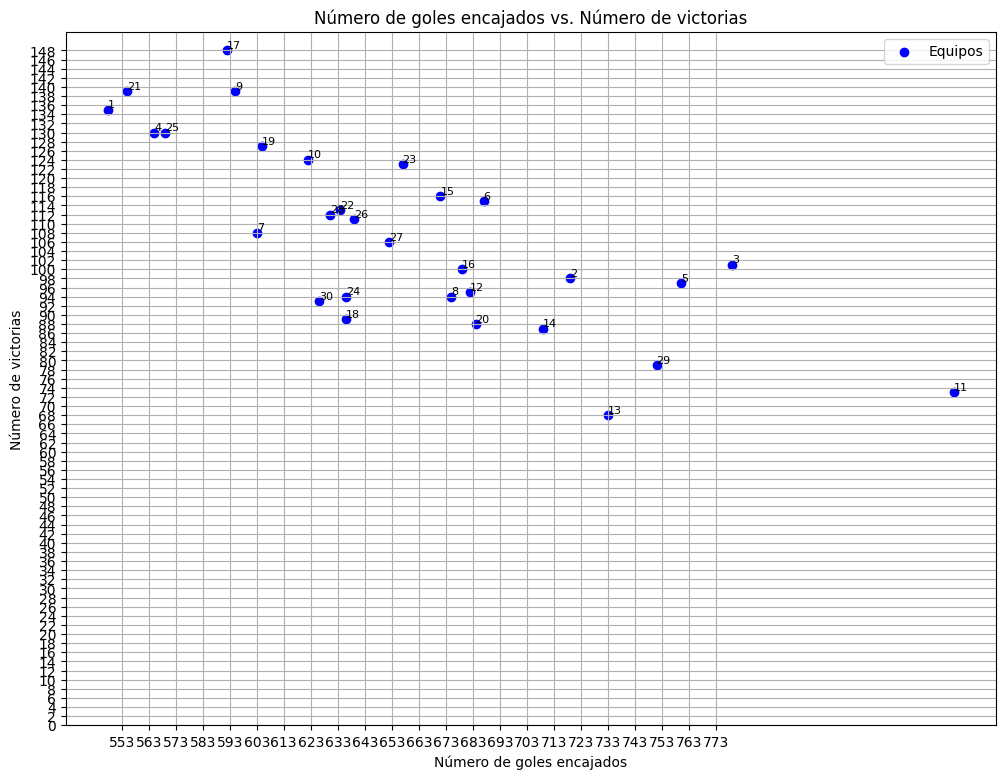

In [8]:
equipos = get_equipos(dataframe=dataframe_liga)
goles_encajados_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    goles_encajados_todos_equipos.append(get_goles_en_contra(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_goles = max(goles_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)
minimo_goles = min(goles_marcados_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(goles_encajados_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos):
    plt.text(goles_encajados_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Número de goles encajados')
plt.ylabel('Número de victorias')
plt.title('Número de goles encajados vs. Número de victorias')
plt.xticks(range(minimo_goles-3, maximos_goles+1, 10))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

## Fusionar ambos datos

### Primera aproximación: Gol Average

In [9]:
def get_gol_average(dataframe: pd.DataFrame, equipo: str) -> int:
    goles_a_favor = get_goles_a_favor(dataframe=dataframe, equipo=equipo)
    goles_en_contra = get_goles_en_contra(dataframe=dataframe, equipo=equipo)
    return goles_a_favor - goles_en_contra

for equipo in equipos:
    gol_average = get_gol_average(dataframe=dataframe_liga, equipo=equipo)
    #print("El "+equipo+" tiene un gol average de: "+str(gol_average))

### Graficar los datos

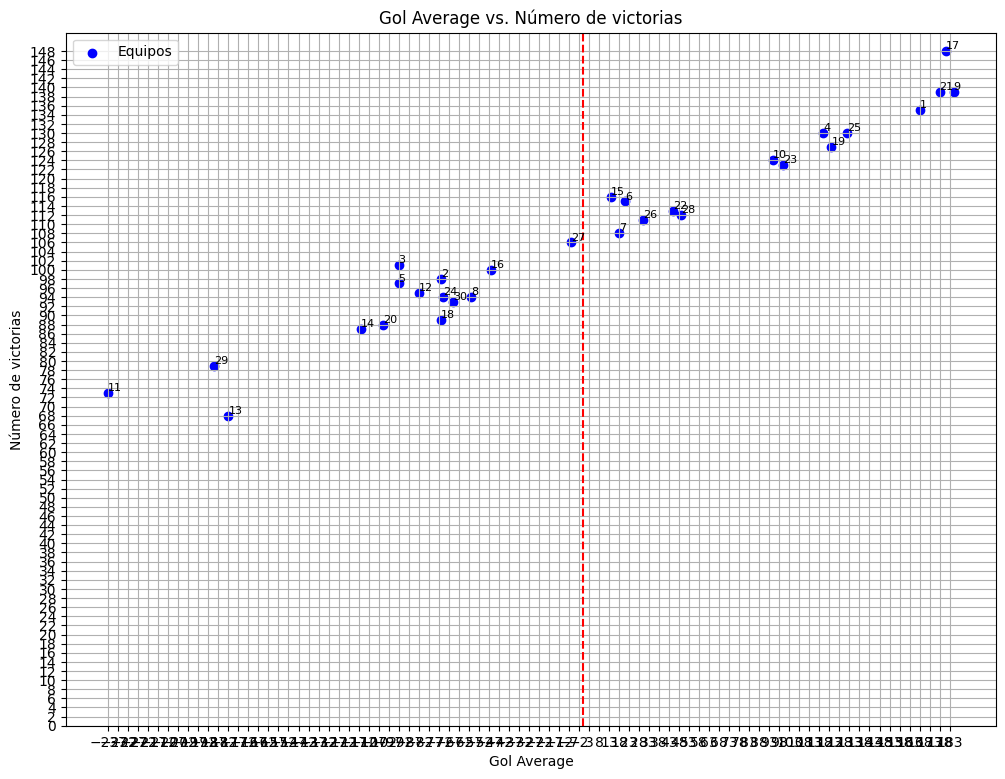

In [10]:
equipos = get_equipos(dataframe=dataframe_liga)
gol_average_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    gol_average_todos_equipos.append(get_gol_average(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
minimo_goles = min(gol_average_todos_equipos)
maximos_goles = max(gol_average_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(gol_average_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos):
    plt.text(gol_average_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Gol Average')
plt.ylabel('Número de victorias')
plt.title('Gol Average vs. Número de victorias')
plt.xticks(range(minimo_goles, maximos_goles+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

### Segunda aproximación: media de goles marcados por partido

In [11]:
def get_media_goles_marcados(dataframe: pd.DataFrame, equipo: str) -> float:
    goles_marcados = get_goles_a_favor(dataframe=dataframe, equipo=equipo)
    equipos = get_equipos(dataframe=dataframe)
    partidos_jugados = 2 * len(dataframe) / len(equipos)
    return goles_marcados / partidos_jugados

for equipo in equipos:
    media_goles_marcados = get_media_goles_marcados(dataframe=dataframe_liga, equipo=equipo)
    #print("El "+equipo+" tiene una media de goles marcados por partido de: "+str(media_goles_marcados))

### Graficar datos

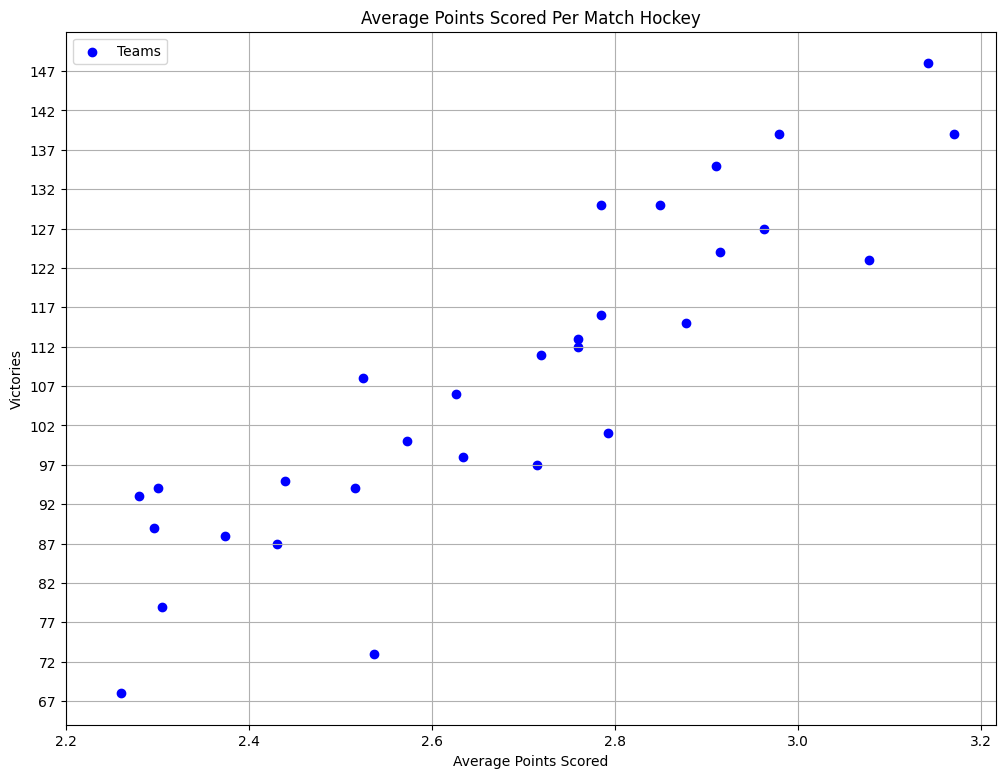

In [17]:
equipos = get_equipos(dataframe=dataframe_liga)
media_goles_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    media_goles_todos_equipos.append(get_media_goles_marcados(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_goles = max(media_goles_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)
minimo_goles = min(media_goles_todos_equipos)
minimo_victorias = min(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(media_goles_todos_equipos, victorias_todos_equipos, color='blue', label='Teams')  # Puntos en la gráfica para cada equipo
#for i, equipo in enumerate(equipos):
#    plt.text(media_goles_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Average Points Scored')
plt.ylabel('Victories')
plt.title('Average Points Scored Per Match Hockey')

# Configurar los valores del eje x con decimales y saltos de 0.2
plt.xticks(np.arange(round(minimo_goles, 1)-0.1, round(maximos_goles, 1), 0.2))

# Configurar los valores del eje y (manteniendo el ejemplo dado)
plt.yticks(np.arange(minimo_victorias-1, maximas_victorias+1, 5))

plt.grid(True)
plt.legend()
plt.show()

### Tercera aproximación: Media de goles encajados por partido

In [57]:
def get_media_goles_encajados(dataframe: pd.DataFrame, equipo: str) -> float:
    goles_encajados = get_goles_en_contra(dataframe=dataframe, equipo=equipo)
    equipos = get_equipos(dataframe=dataframe)
    partidos_jugados = 2 * len(dataframe) / len(equipos)
    return goles_encajados / partidos_jugados

for equipo in equipos:
    media_goles_encajados = get_media_goles_encajados(dataframe=dataframe_liga, equipo=equipo)
    #print("El "+equipo+" tiene una media de goles encajados por partido de: "+str(media_goles_encajados))

### Graficar los datos

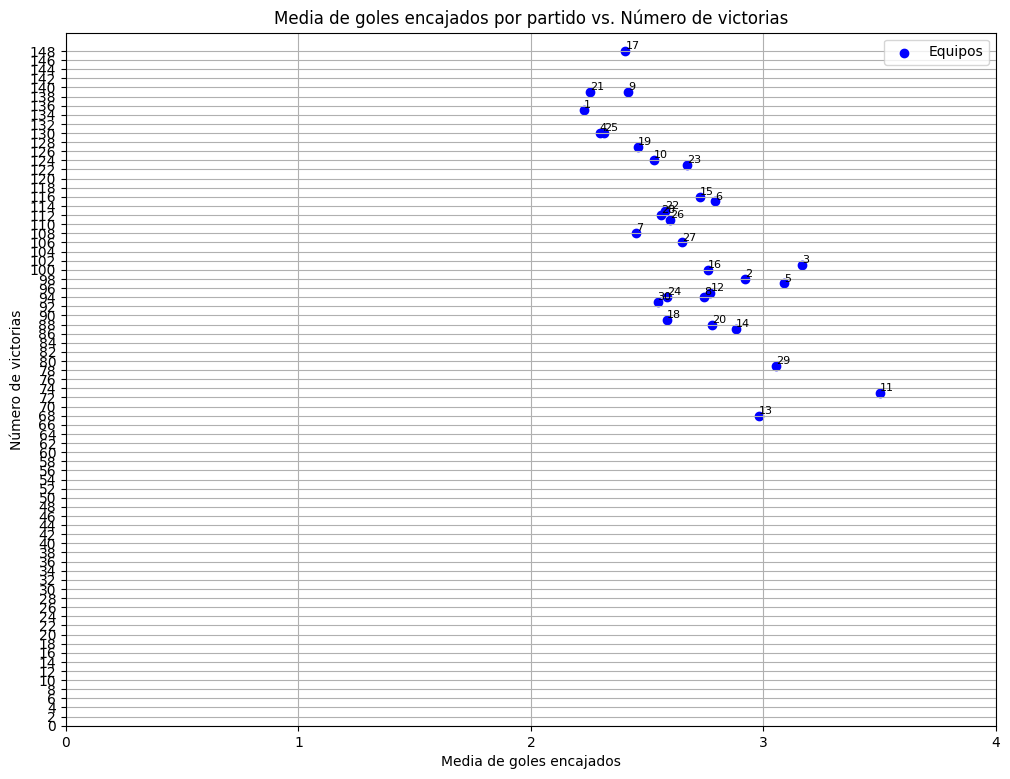

In [58]:
equipos = get_equipos(dataframe=dataframe_liga)
media_goles_encajados_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    media_goles_encajados_todos_equipos.append(get_media_goles_encajados(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_goles = max(media_goles_encajados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(media_goles_encajados_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos):
    plt.text(media_goles_encajados_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Media de goles encajados')
plt.ylabel('Número de victorias')
plt.title('Media de goles encajados por partido vs. Número de victorias')
plt.xticks(range(0, round(maximos_goles)+1, 1))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

### Cuarta aproximación: Media goles marcados - Media goles encajados

In [59]:
def get_media_goles_marcados_menos_encajados(dataframe: pd.DataFrame, equipo: str) -> float:
    goles_encajados = get_media_goles_encajados(dataframe=dataframe, equipo=equipo)
    goles_marcados = get_media_goles_marcados(dataframe=dataframe, equipo=equipo)
    return goles_marcados - goles_encajados

for equipo in equipos:
    media_goles_marcados_menos_encajados = get_media_goles_marcados_menos_encajados(dataframe=dataframe_liga, equipo=equipo)
    #print("El "+equipo+" tiene una media de goles marcados - encajados por partido de: "+str(media_goles_marcados_menos_encajados))

### Graficar datos

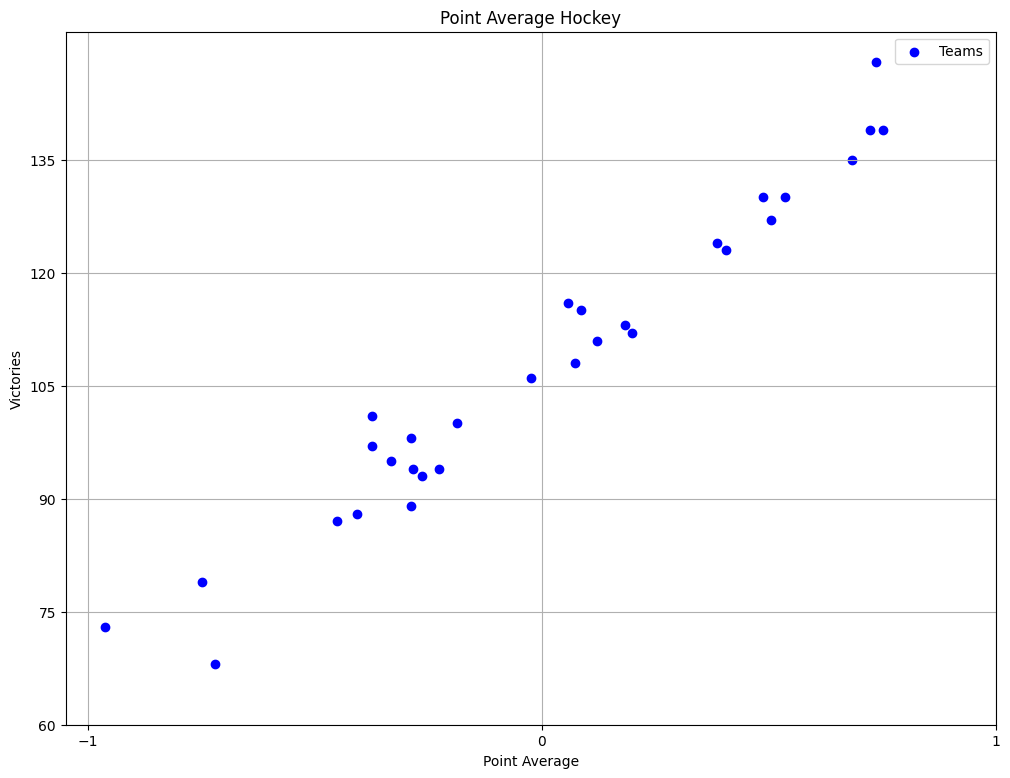

In [62]:
equipos = get_equipos(dataframe=dataframe_liga)
media_goles_marcados_menos_encajados_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    media_goles_marcados_menos_encajados_todos_equipos.append(get_media_goles_marcados_menos_encajados(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
minimo_goles = min(media_goles_marcados_menos_encajados_todos_equipos)
maximos_goles = max(media_goles_marcados_menos_encajados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(media_goles_marcados_menos_encajados_todos_equipos, victorias_todos_equipos, color='blue', label='Teams')  # Puntos en la gráfica para cada equipo
#for i, equipo in enumerate(equipos):
    #plt.text(media_goles_marcados_menos_encajados_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Point Average')
plt.ylabel('Victories')
plt.title('Point Average Hockey')
plt.xticks(range(round(minimo_goles), round(maximos_goles)+1, 1))  # Definir los límites y el paso del eje x
plt.yticks(range(60, maximas_victorias+1, 15))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

## Relevancia de Local o Visitante

### ¿Es importante el campo donde se juega?

In [39]:
def get_resultados_totales(dataframe: pd.DataFrame) -> list:
    victorias_local = len(dataframe.loc[dataframe['FTR'] == 'H'])
    empates = len(dataframe.loc[dataframe['FTR'] == 'D'])
    victorias_visitante = len(dataframe.loc[dataframe['FTR'] == 'A'])
    return (victorias_local,empates,victorias_visitante)

resultados = get_resultados_totales(dataframe=dataframe_liga)
#print("Victorias local: "+str(resultados[0]))
#print("Empates: "+str(resultados[1]))
#print("Victorias visitante: "+str(resultados[2]))

### Graficar datos

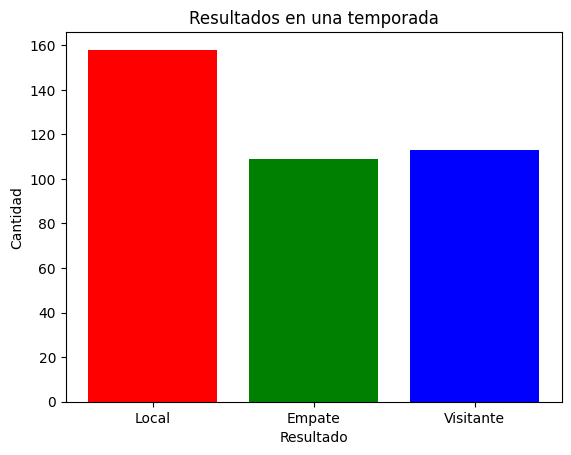

In [40]:
resultados = get_resultados_totales(dataframe=dataframe_liga)
variables = ['Local','Empate','Visitante']

plt.bar(variables, resultados, color=['red', 'green', 'blue'])

plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.title('Resultados en una temporada')

plt.show()

## Importancia de las tarjetas rojas

In [41]:
def get_media_rojas(dataframe: pd.DataFrame, equipo: str) -> float:
    rojas_local = dataframe.loc[dataframe['HomeTeam'] == equipo, 'HR'].sum()
    rojas_visitante = dataframe.loc[dataframe['AwayTeam'] == equipo, 'AR'].sum()
    partidos_jugados = 2 * len(dataframe) / len(equipos)
    return (rojas_local + rojas_visitante) / partidos_jugados

for equipo in equipos:
    media_rojas = get_media_rojas(dataframe=dataframe_liga, equipo=equipo)
    #print("El "+equipo+" tiene una media de rojas de "+str(media_rojas))

### Graficar datos

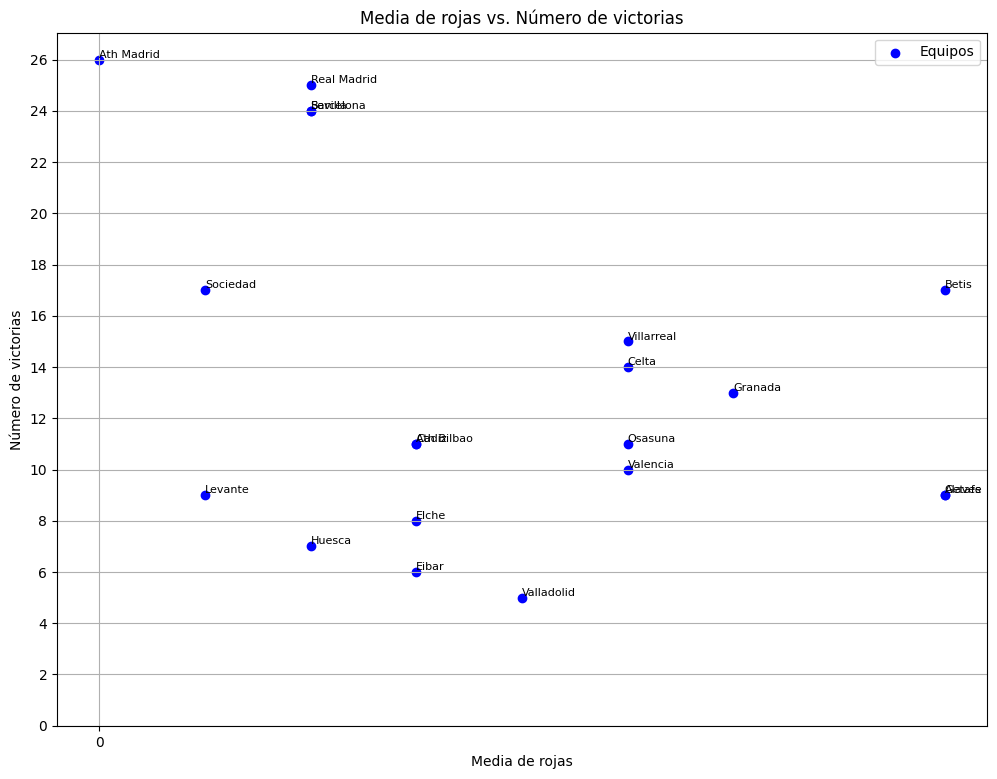

In [42]:
equipos = get_equipos(dataframe=dataframe_liga)
media_rojas_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    media_rojas_todos_equipos.append(get_media_rojas(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_goles = max(media_rojas_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(media_rojas_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos):
    plt.text(media_rojas_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Media de rojas')
plt.ylabel('Número de victorias')
plt.title('Media de rojas vs. Número de victorias')
plt.xticks(range(0, round(maximos_goles)+1, 1))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

## Racha de victorias

In [43]:
def get_resultados_equipo(dataframe: pd.DataFrame, equipo=equipo) -> list:
    lista_resultados = []
    for idx, fila in dataframe.iterrows():
        if fila['HomeTeam'] == equipo:
            if fila['FTR'] == 'H':
                lista_resultados.append('W')
            elif fila['FTR'] == 'A':
                lista_resultados.append('D')
            else:
                lista_resultados.append('L')
        if fila['AwayTeam'] == equipo:
            if fila['FTR'] == 'A':
                lista_resultados.append('W')
            elif fila['FTR'] == 'H':
                lista_resultados.append('D')
            else:
                lista_resultados.append('L')
    return lista_resultados

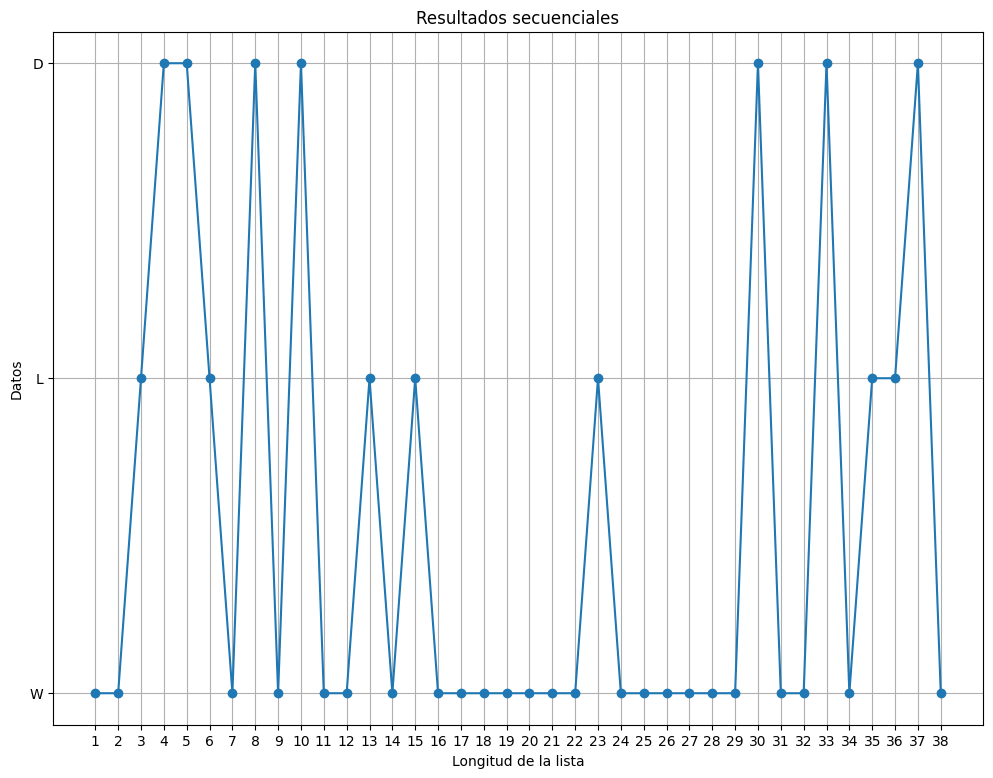

In [46]:
datos = get_resultados_equipo(dataframe=dataframe_liga, equipo="Barcelona")
longitud = len(datos)
plt.figure(figsize=(12, 9))
plt.plot(range(1, longitud + 1), datos, marker='o')

plt.xticks(range(1, longitud + 1))

plt.xlabel('Longitud de la lista')
plt.ylabel('Datos')

plt.title('Resultados secuenciales')

# Mostrar la gráfica
plt.grid(True)
plt.show()

## Diferencia de gol average medio entre un partido y el anterior

### Goles marcados por partido

In [47]:
def get_goles_marcados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_goles_por_partido = []
    partidos_del_equipo = dataframe.loc[(dataframe['HomeTeam'] == equipo) | (dataframe['AwayTeam'] == equipo)]
    for idx, partido in partidos_del_equipo.iterrows():
        if partido['HomeTeam'] == equipo:
            lista_goles_por_partido.append(partido['FTHG'])
        if partido['AwayTeam'] == equipo:
            lista_goles_por_partido.append(partido['FTAG'])
    return lista_goles_por_partido

lista = get_goles_marcados_por_partido(dataframe=dataframe_liga, equipo="Celta")
print(lista)

[0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 3, 2, 4, 2, 1, 2, 0, 0, 1, 1, 0, 2, 3, 0, 1, 4, 0, 1, 3, 3, 0, 1, 2, 2, 4, 1, 2, 2]


### Goles encajados por partido

In [64]:
def get_goles_encajados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_goles_por_partido = []
    partidos_del_equipo = dataframe.loc[(dataframe['HomeTeam'] == equipo) | (dataframe['AwayTeam'] == equipo)]
    for idx, partido in partidos_del_equipo.iterrows():
        if partido['HomeTeam'] == equipo:
            lista_goles_por_partido.append(partido['FTAG'])
        if partido['AwayTeam'] == equipo:
            lista_goles_por_partido.append(partido['FTHG'])
    return lista_goles_por_partido

lista = get_goles_encajados_por_partido(dataframe=dataframe_liga, equipo="Barcelona")
print(lista)

[0, 0, 1, 1, 3, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2, 0, 3, 2, 0]


### Media goles marcados por partido

In [49]:
def get_media_goles_marcados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_goles_por_partido = get_goles_marcados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_goles_por_partido = []
    goles_acumulados = 0
    for idx, valor in enumerate(lista_goles_por_partido):
        lista_media_goles_por_partido.append((valor + goles_acumulados) / (idx+1))
        goles_acumulados += valor
    return lista_media_goles_por_partido
lista = get_media_goles_marcados_por_partido(dataframe=dataframe_liga, equipo="Celta")
print(lista)

[0.0, 1.0, 1.0, 0.75, 0.6, 0.5, 0.5714285714285714, 0.625, 0.6666666666666666, 0.8, 1.0, 1.0833333333333333, 1.3076923076923077, 1.3571428571428572, 1.3333333333333333, 1.375, 1.2941176470588236, 1.2222222222222223, 1.2105263157894737, 1.2, 1.1428571428571428, 1.1818181818181819, 1.2608695652173914, 1.2083333333333333, 1.2, 1.3076923076923077, 1.2592592592592593, 1.25, 1.3103448275862069, 1.3666666666666667, 1.3225806451612903, 1.3125, 1.3333333333333333, 1.3529411764705883, 1.4285714285714286, 1.4166666666666667, 1.4324324324324325, 1.4473684210526316]


### Media goles encajados por partido

In [50]:
def get_media_goles_encajados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_goles_por_partido = get_goles_encajados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_goles_por_partido = []
    goles_acumulados = 0
    for idx, valor in enumerate(lista_goles_por_partido):
        lista_media_goles_por_partido.append((valor + goles_acumulados) / (idx+1))
        goles_acumulados += valor
    return lista_media_goles_por_partido
lista = get_media_goles_encajados_por_partido(dataframe=dataframe_liga, equipo="Celta")
print(lista)

[0.0, 0.5, 0.6666666666666666, 1.25, 1.4, 1.5, 1.4285714285714286, 1.75, 1.6666666666666667, 1.9, 1.8181818181818181, 1.6666666666666667, 1.5384615384615385, 1.4285714285714286, 1.4, 1.375, 1.411764705882353, 1.5555555555555556, 1.5789473684210527, 1.55, 1.4761904761904763, 1.5, 1.4782608695652173, 1.5, 1.48, 1.5384615384615385, 1.4814814814814814, 1.5357142857142858, 1.5172413793103448, 1.6, 1.5483870967741935, 1.5625, 1.5454545454545454, 1.5, 1.5142857142857142, 1.4722222222222223, 1.4594594594594594, 1.5]


### Gol average por partido

In [63]:
def get_gol_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_goles_marcados_por_partido = get_goles_marcados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_goles_encajados_por_partido = get_goles_encajados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_gol_average_por_partido = []
    for idx, valor in enumerate(lista_goles_marcados_por_partido):
        lista_gol_average_por_partido.append(valor - lista_goles_encajados_por_partido[idx])
    return lista_gol_average_por_partido
lista = get_gol_average_por_partido(dataframe=dataframe_liga, equipo="Barcelona")
print(lista)

[4, 3, 0, -1, -2, 0, 3, -1, 4, -1, 1, 1, 0, 3, 0, 1, 1, 4, 2, 1, 1, 4, 0, 3, 2, 2, 3, 5, 1, -1, 3, 1, -1, 1, 0, 0, -1, 1]


### Gol average medio por partido

In [52]:
def get_media_gol_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_goles_marcados_por_partido = get_goles_marcados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_goles_encajados_por_partido = get_goles_encajados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_gol_average_por_partido = []
    valor_acumulado = 0
    for idx, valor in enumerate(lista_goles_marcados_por_partido):
        lista_media_gol_average_por_partido.append((valor - lista_goles_encajados_por_partido[idx] + valor_acumulado) / (idx+1))
        valor_acumulado += (valor - lista_goles_encajados_por_partido[idx])
    return lista_media_gol_average_por_partido
lista = get_media_gol_average_por_partido(dataframe=dataframe_liga, equipo="Celta")
print(lista)

[0.0, 0.5, 0.3333333333333333, -0.5, -0.8, -1.0, -0.8571428571428571, -1.125, -1.0, -1.1, -0.8181818181818182, -0.5833333333333334, -0.23076923076923078, -0.07142857142857142, -0.06666666666666667, 0.0, -0.11764705882352941, -0.3333333333333333, -0.3684210526315789, -0.35, -0.3333333333333333, -0.3181818181818182, -0.21739130434782608, -0.2916666666666667, -0.28, -0.23076923076923078, -0.2222222222222222, -0.2857142857142857, -0.20689655172413793, -0.23333333333333334, -0.22580645161290322, -0.25, -0.21212121212121213, -0.14705882352941177, -0.08571428571428572, -0.05555555555555555, -0.02702702702702703, -0.05263157894736842]


## Graficar los datos

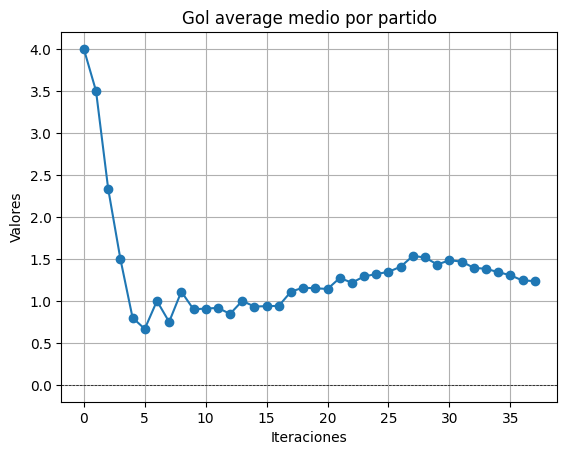

In [58]:
datos = get_media_gol_average_por_partido(dataframe=dataframe_liga, equipo="Barcelona")
iteraciones = range(len(datos))

plt.plot(iteraciones, datos, marker='o', linestyle='-')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Gol average medio por partido')

plt.grid(True)
plt.show()

### Diferencia de gol average medio respecto al partido anterior

In [54]:
def get_diferencia_media_gol_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_media_gol_average_por_partido = get_media_gol_average_por_partido(dataframe=dataframe, equipo=equipo)
    lista_diferencias = []
    primero = True
    valor_anterior = 0
    for valor in lista_media_gol_average_por_partido:
        lista_diferencias.append(valor - valor_anterior)
        valor_anterior = valor
    return lista_diferencias
lista = get_diferencia_media_gol_average_por_partido(dataframe=dataframe_liga, equipo="Barcelona")
print(lista)

[4.0, -0.5, -1.1666666666666665, -0.8333333333333335, -0.7, -0.13333333333333341, 0.33333333333333337, -0.25, 0.36111111111111116, -0.21111111111111114, 0.009090909090909038, 0.007575757575757569, -0.07051282051282048, 0.15384615384615385, -0.06666666666666665, 0.004166666666666652, 0.003676470588235281, 0.16993464052287588, 0.04678362573099415, -0.007894736842105399, -0.0071428571428571175, 0.1298701298701299, -0.05533596837944654, 0.07427536231884058, 0.02833333333333332, 0.026153846153846194, 0.061253561253561184, 0.12830687830687837, -0.01847290640394106, -0.0839080459770114, 0.05053763440860215, -0.015120967741935498, -0.07481060606060597, -0.011586452762923471, -0.03949579831932781, -0.03730158730158717, -0.06231231231231238, -0.006401137980085236]


### Graficar datos

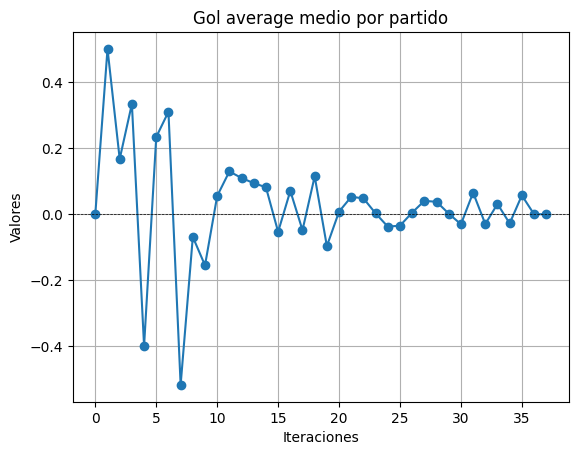

In [55]:
datos = get_diferencia_media_gol_average_por_partido(dataframe=dataframe_liga, equipo="Real Madrid")
iteraciones = range(len(datos))

plt.plot(iteraciones, datos, marker='o', linestyle='-')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Gol average medio por partido')

plt.grid(True)
plt.show()

### Graficar gol average medio y diferencias

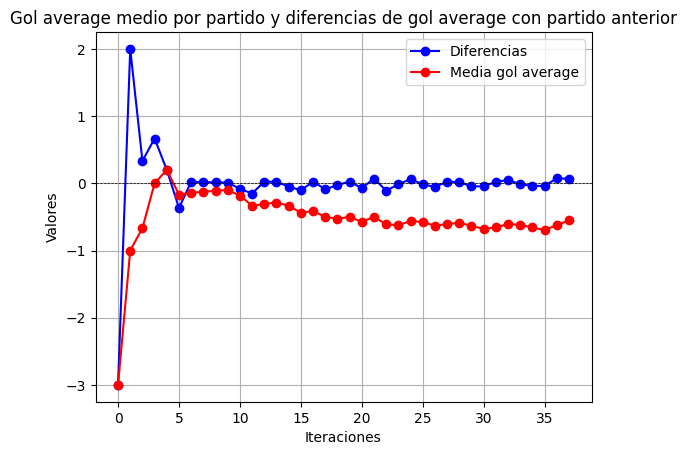

In [56]:
datos1 = get_diferencia_media_gol_average_por_partido(dataframe=dataframe_liga, equipo="Elche")
datos2 = get_media_gol_average_por_partido(dataframe=dataframe_liga,equipo="Elche")
iteraciones = range(len(datos1))

plt.plot(iteraciones, datos1, marker='o', linestyle='-', color='blue', label='Diferencias')
plt.plot(iteraciones, datos2, marker='o', linestyle='-', color='red', label='Media gol average')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Gol average medio por partido y diferencias de gol average con partido anterior')

plt.legend()
plt.grid(True)
plt.show()

### Puntos en liga cada partido

In [59]:
def get_puntos_en_liga_equipo(dataframe: pd.DataFrame, equipo: str) -> list:
   numero_victorias_home = dataframe.loc[(dataframe['HomeTeam'] == equipo) & (dataframe['FTR'] == 'H'), 'FTR'].count()
   numero_victorias_away = dataframe.loc[(dataframe['AwayTeam'] == equipo) & (dataframe['FTR'] == 'A'), 'FTR'].count()
   numero_empates_home = dataframe.loc[(dataframe['HomeTeam'] == equipo) & (dataframe['FTR'] == 'D'), 'FTR'].count()
   numero_empates_away = dataframe.loc[(dataframe['AwayTeam'] == equipo) & (dataframe['FTR'] == 'D'), 'FTR'].count()
   numero_derrotas_home = dataframe.loc[(dataframe['HomeTeam'] == equipo) & (dataframe['FTR'] == 'A'), 'FTR'].count()
   numero_derrotas_away = dataframe.loc[(dataframe['AwayTeam'] == equipo) & (dataframe['FTR'] == 'H'), 'FTR'].count()

   return 3 * (numero_victorias_home + numero_victorias_away) + (numero_empates_home + numero_empates_away)

lista = get_puntos_en_liga_equipo(dataframe=dataframe_liga, equipo='Barcelona')
print(lista)

79


### Graficar datos

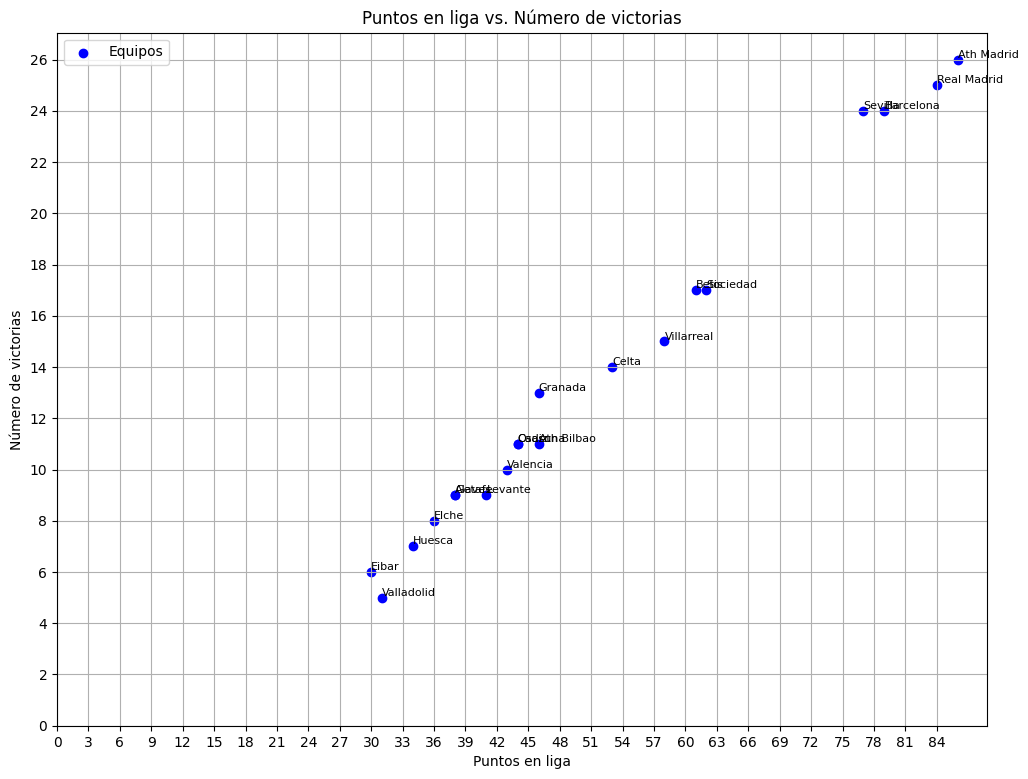

In [61]:
equipos = get_equipos(dataframe=dataframe_liga)
puntos_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    puntos_todos_equipos.append(get_puntos_en_liga_equipo(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_puntos = max(puntos_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos):
    plt.text(puntos_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Puntos en liga')
plt.ylabel('Número de victorias')
plt.title('Puntos en liga vs. Número de victorias')
plt.xticks(range(0, round(maximos_puntos)+1, 3))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

### Porterias a cero

In [69]:
def get_porterias_a_0(dataframe: pd.DataFrame, equipo: str) -> int:
    lista = get_goles_encajados_por_partido(dataframe=dataframe_liga, equipo=equipo)
    return lista.count(0)

lista = get_porterias_a_0(dataframe=dataframe_liga, equipo="Barcelona")
lista

14

### Graficar datos

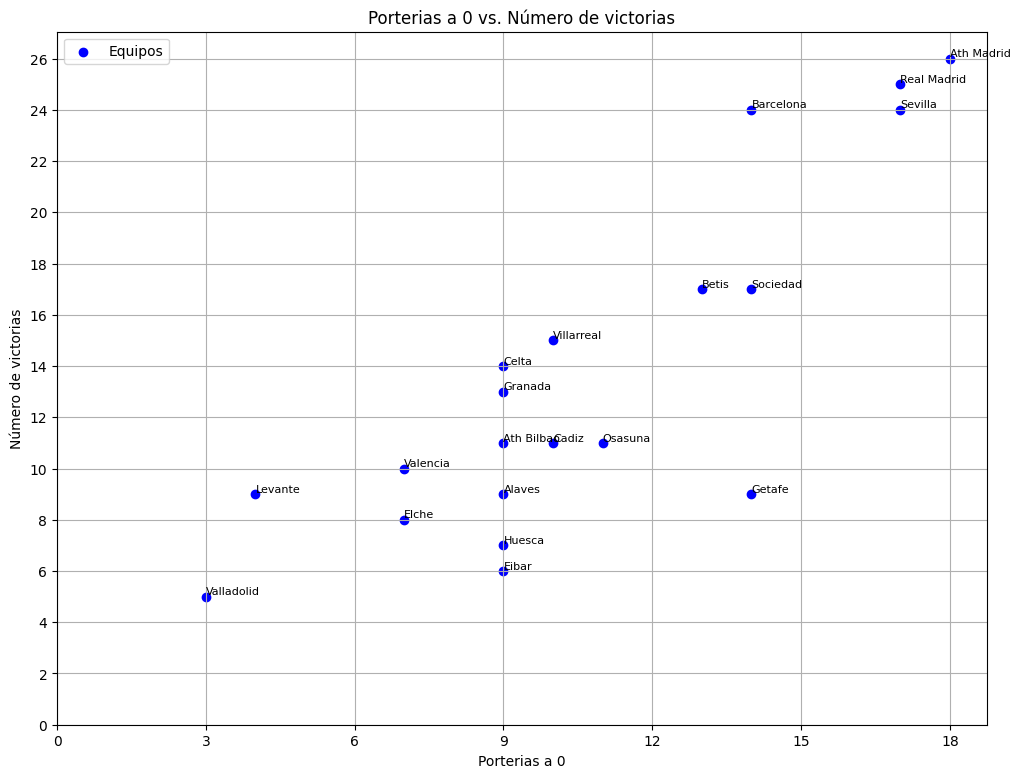

In [70]:
equipos = get_equipos(dataframe=dataframe_liga)
porterias_a_0_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    porterias_a_0_todos_equipos.append(get_porterias_a_0(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_puntos = max(porterias_a_0_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(porterias_a_0_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos):
    plt.text(porterias_a_0_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Porterias a 0')
plt.ylabel('Número de victorias')
plt.title('Porterias a 0 vs. Número de victorias')
plt.xticks(range(0, round(maximos_puntos)+1, 3))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()